<a href="https://colab.research.google.com/github/Elfeny7/ComputerVision_Learn/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ikmal Faris Musyaffa / 12 / TI-3B / 2141720123**

In [27]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image

## **Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)**

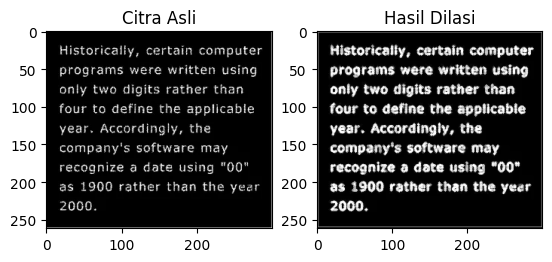

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def dilasi_citra(input_image):
    # Baca citra masukan
    image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

    # Structuring Element (SED) berbentuk cross 3x3
    sed = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Proses dilasi
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            dilated_image[y, x] = np.max(image[y-1:y+2, x-1:x+2] * sed)

    return dilated_image

if __name__ == "__main__":
    input_image = "morphology.png"

    dilated_image = dilasi_citra(input_image)

    # Tampilkan citra asli
    plt.subplot(121)
    plt.imshow(cv2.imread(input_image, cv2.IMREAD_GRAYSCALE), cmap="gray")
    plt.title("Citra Asli")

    # Tampilkan hasil dilasi
    plt.subplot(122)
    plt.imshow(dilated_image, cmap="gray")
    plt.title("Hasil Dilasi")

    plt.show()


## **Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)**

Text(0.5, 1.0, 'Hasil Dilasi')

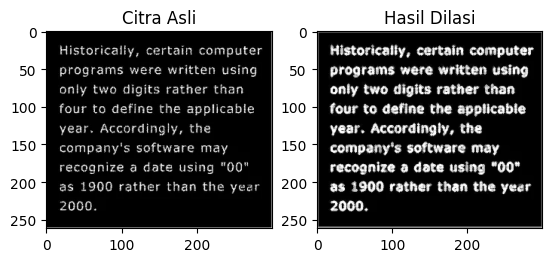

In [36]:
# Baca citra masukan
input_image = "morphology.png"
image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

# Structuring Element (SED) berbentuk cross 3x3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Lakukan operasi dilasi
dilated_image = cv2.dilate(image, sed, iterations=1)

plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli")

# Tampilkan citra hasil dilasi
plt.subplot(122)
plt.imshow(dilated_image, cmap="gray")
plt.title("Hasil Dilasi")

## **Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

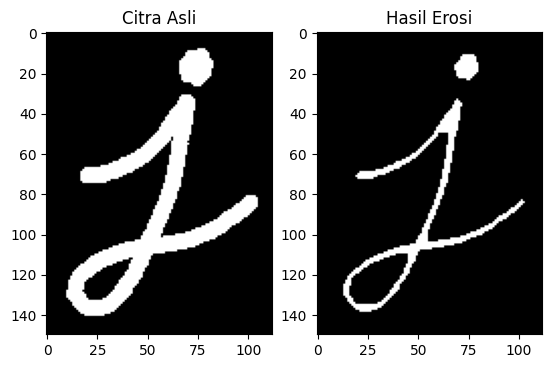

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def erosi_citra(input_image):
    # Baca citra masukan
    image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

    # Structuring Element (SE) berbentuk square 5x5
    se = np.ones((5, 5), dtype=np.uint8)

    # Dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Proses erosi
    for y in range(2, height - 2):
        for x in range(2, width - 2):
            eroded_image[y, x] = np.min(image[y-2:y+3, x-2:x+3] * se)

    return eroded_image

if __name__ == "__main__":
    input_image = "j.png"

    eroded_image = erosi_citra(input_image)

    # Tampilkan citra asli
    plt.subplot(121)
    plt.imshow(cv2.imread(input_image, cv2.IMREAD_GRAYSCALE), cmap="gray")
    plt.title("Citra Asli")

    # Tampilkan hasil erosi
    plt.subplot(122)
    plt.imshow(eroded_image, cmap="gray")
    plt.title("Hasil Erosi")

    plt.show()


## **Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

Text(0.5, 1.0, 'Hasil Erosi')

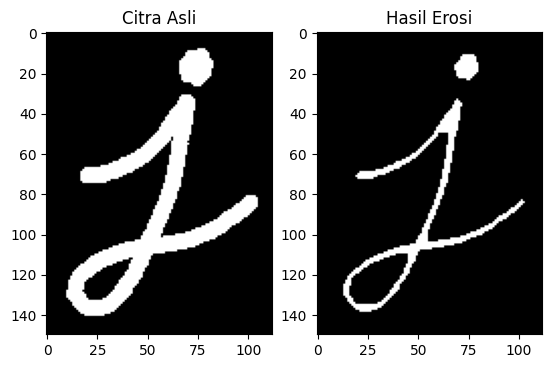

In [45]:
import cv2
import numpy as np

# Baca citra masukan
input_image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# Structuring Element (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan operasi erosi
eroded_image = cv2.erode(input_image, se, iterations=1)

plt.subplot(121)
plt.imshow(input_image, cmap="gray")
plt.title("Citra Asli")

# Tampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(eroded_image, cmap="gray")
plt.title("Hasil Erosi")

## **Fingerprint Erosi, Dilasi, Opening, Closing tanpa library**

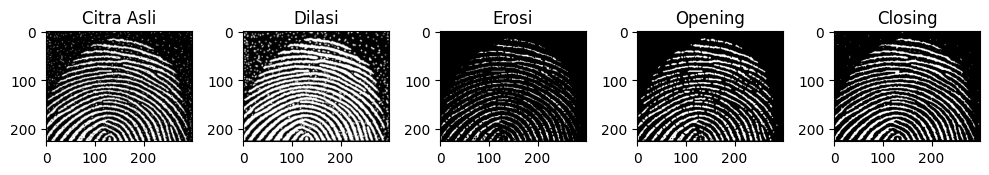

In [76]:
def dilasi_citra(image):
    # Baca citra masukan

    # Structuring Element (SED) berbentuk cross 3x3
    sed = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Proses dilasi
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            dilated_image[y, x] = np.max(image[y-1:y+2, x-1:x+2] * sed)

    return dilated_image

def erosi_citra(image):
    # Baca citra masukan

    # Lakukan thresholding pada citra
    _, threshed_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element (SE) berbentuk square 3x3
    se = np.ones((3, 3), dtype=np.uint8)

    # Dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Proses erosi
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if np.all(threshed_image[y-1:y+2, x-1:x+2] == 255):
                eroded_image[y, x] = 255

    return eroded_image

input_image = "fingerprint.png"
citra_awal = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)
dilated_image = dilasi_citra(citra_awal)
eroded_image = erosi_citra(citra_awal)

def opening_citra(image):
    eroded_image = erosi_citra(citra_awal)
    opened_image = dilasi_citra(eroded_image)
    return opened_image

def closing_citra(image):
    dilated_image = dilasi_citra(citra_awal)
    closed_image = erosi_citra(dilated_image)
    return closed_image

opened_image = opening_citra(citra_awal)
closed_image = closing_citra(citra_awal)

plt.figure(figsize=(10, 5))

plt.subplot(151)
plt.imshow(citra_awal, cmap="gray")
plt.title("Citra Asli")

plt.subplot(152)
plt.imshow(dilated_image, cmap="gray")
plt.title("Dilasi")

plt.subplot(153)
plt.imshow(eroded_image, cmap="gray")
plt.title("Erosi")

plt.subplot(154)
plt.imshow(opened_image, cmap="gray")
plt.title("Opening")

plt.subplot(155)
plt.imshow(closed_image, cmap="gray")
plt.title("Closing")

plt.tight_layout()
plt.show()


## **Fingerprint Erosi, Dilasi, Opening, Closing tanpa library**

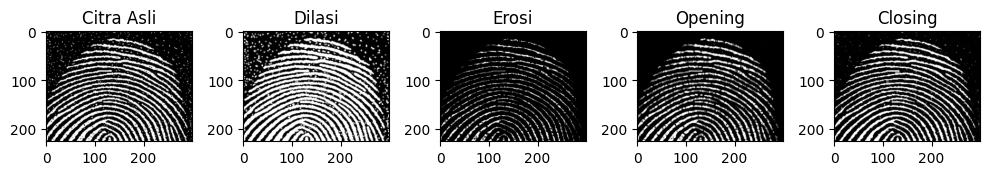

In [78]:
def dilasi_citra(image):
    sed = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)
    dilated_image = cv2.dilate(image, sed, iterations=1)
    return dilated_image

def erosi_citra(image):
    se = np.ones((3, 3), dtype=np.uint8)
    eroded_image = cv2.erode(image, se, iterations=1)
    return eroded_image

input_image = "fingerprint.png"
citra_awal = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)
dilated_image = dilasi_citra(citra_awal)
eroded_image = erosi_citra(citra_awal)

def opening_citra(image):
    eroded_image = erosi_citra(citra_awal)
    opened_image = dilasi_citra(eroded_image)
    return opened_image

def closing_citra(image):
    dilated_image = dilasi_citra(citra_awal)
    closed_image = erosi_citra(dilated_image)
    return closed_image

opened_image = opening_citra(citra_awal)
closed_image = closing_citra(citra_awal)

plt.figure(figsize=(10, 5))

plt.subplot(151)
plt.imshow(citra_awal, cmap="gray")
plt.title("Citra Asli")

plt.subplot(152)
plt.imshow(dilated_image, cmap="gray")
plt.title("Dilasi")

plt.subplot(153)
plt.imshow(eroded_image, cmap="gray")
plt.title("Erosi")

plt.subplot(154)
plt.imshow(opened_image, cmap="gray")
plt.title("Opening")

plt.subplot(155)
plt.imshow(closed_image, cmap="gray")
plt.title("Closing")

plt.tight_layout()
plt.show()


## **Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

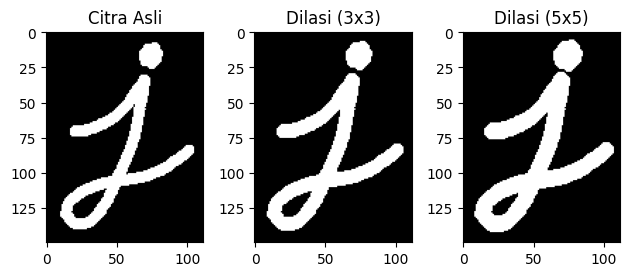

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
input_image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# Structuring Element (SE) berbentuk cross 3x3
sed_3x3 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

# Structuring Element (SE) berbentuk cross 5x5
sed_5x5 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

# Proses dilasi dengan SE 3x3
dilated_image_3x3 = cv2.dilate(input_image, sed_3x3, iterations=1)

# Proses dilasi dengan SE 5x5
dilated_image_5x5 = cv2.dilate(input_image, sed_5x5, iterations=1)

# Menampilkan citra hasil dilasi
plt.subplot(131)
plt.imshow(input_image, cmap="gray")
plt.title("Citra Asli")

plt.subplot(132)
plt.imshow(dilated_image_3x3, cmap="gray")
plt.title("Dilasi (3x3)")

plt.subplot(133)
plt.imshow(dilated_image_5x5, cmap="gray")
plt.title("Dilasi (5x5)")

plt.tight_layout()
plt.show()


## **Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

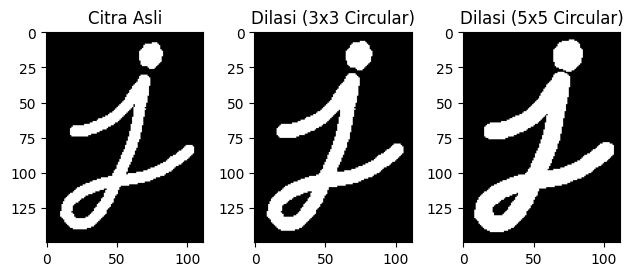

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
input_image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk circular 3x3
sed_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Membuat Structuring Element (SE) berbentuk circular 5x5
sed_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Proses dilasi dengan SE 3x3
dilated_image_3x3 = cv2.dilate(input_image, sed_3x3, iterations=1)

# Proses dilasi dengan SE 5x5
dilated_image_5x5 = cv2.dilate(input_image, sed_5x5, iterations=1)

# Menampilkan citra hasil dilasi
plt.subplot(131)
plt.imshow(input_image, cmap="gray")
plt.title("Citra Asli")

plt.subplot(132)
plt.imshow(dilated_image_3x3, cmap="gray")
plt.title("Dilasi (3x3 Circular)")

plt.subplot(133)
plt.imshow(dilated_image_5x5, cmap="gray")
plt.title("Dilasi (5x5 Circular)")

plt.tight_layout()
plt.show()


## **Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

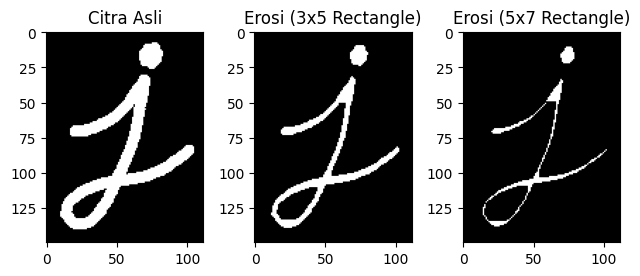

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
input_image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk rectangle 3x5
sed_3x5 = np.ones((3, 5), dtype=np.uint8)

# Membuat Structuring Element (SE) berbentuk rectangle 5x7
sed_5x7 = np.ones((5, 7), dtype=np.uint8)

# Proses erosi dengan SE 3x5
eroded_image_3x5 = cv2.erode(input_image, sed_3x5, iterations=1)

# Proses erosi dengan SE 5x7
eroded_image_5x7 = cv2.erode(input_image, sed_5x7, iterations=1)

# Menampilkan citra hasil erosi
plt.subplot(131)
plt.imshow(input_image, cmap="gray")
plt.title("Citra Asli")

plt.subplot(132)
plt.imshow(eroded_image_3x5, cmap="gray")
plt.title("Erosi (3x5 Rectangle)")

plt.subplot(133)
plt.imshow(eroded_image_5x7, cmap="gray")
plt.title("Erosi (5x7 Rectangle)")

plt.tight_layout()
plt.show()


## **Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

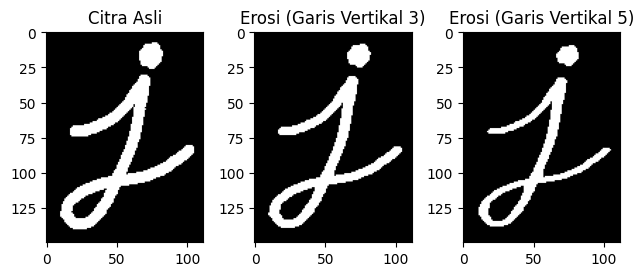

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra masukan
input_image = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk garis vertikal 3
sed_3 = np.ones((3, 1), dtype=np.uint8)

# Membuat Structuring Element (SE) berbentuk garis vertikal 5
sed_5 = np.ones((5, 1), dtype=np.uint8)

# Proses erosi dengan SE 3
eroded_image_3 = cv2.erode(input_image, sed_3, iterations=1)

# Proses erosi dengan SE 5
eroded_image_5 = cv2.erode(input_image, sed_5, iterations=1)

# Menampilkan citra hasil erosi
plt.subplot(131)
plt.imshow(input_image, cmap="gray")
plt.title("Citra Asli")

plt.subplot(132)
plt.imshow(eroded_image_3, cmap="gray")
plt.title("Erosi (Garis Vertikal 3)")

plt.subplot(133)
plt.imshow(eroded_image_5, cmap="gray")
plt.title("Erosi (Garis Vertikal 5)")

plt.tight_layout()
plt.show()
